# Introduce NetworkX and Netgraph

We're going to demonstrate how you can use the `networkx` package and its associated tools to process graph data, analyze it, and visualize it.

But first, let's install some additional packages!

In [1]:
!pip install networkx netgraph requests ipympl

## Load some graph data from a public repo

In [2]:
import requests, zipfile
from io import BytesIO
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.io

# Defining the zip file URL
url = 'https://www.nrvis.com/download/data/inf/inf-USAir97.zip'

# Split URL to get the file name
filename = url.split('/')[-1].split('.')[0]

# Downloading the file by sending the request to the URL
print('Downloading started')
req = requests.get(url)
print('Downloading completed')

# extracting the zip file contents
print('Extracting zipfile')
zipfile= zipfile.ZipFile(BytesIO(req.content))
zipfile.extractall(f'./data/{filename}')

# Load file into graph
G = nx.from_numpy_array(sp.io.mmread('data/inf-USAir97/inf-USAir97.mtx').tocsr())
print(f'Nodes: {nx.number_of_nodes(G)}')
print(f'Edges: {nx.number_of_edges(G)}')

Extracting zipfile
Nodes: 332
Edges: 2126


## Perform basic visualizations

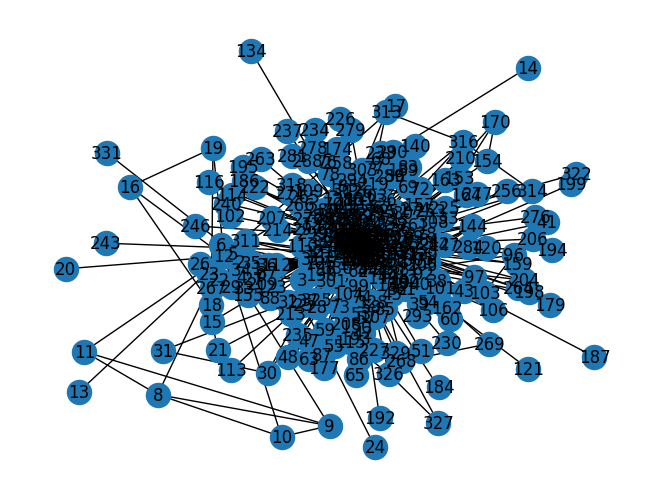

In [3]:
nx.draw(G, with_labels=True)
plt.show()

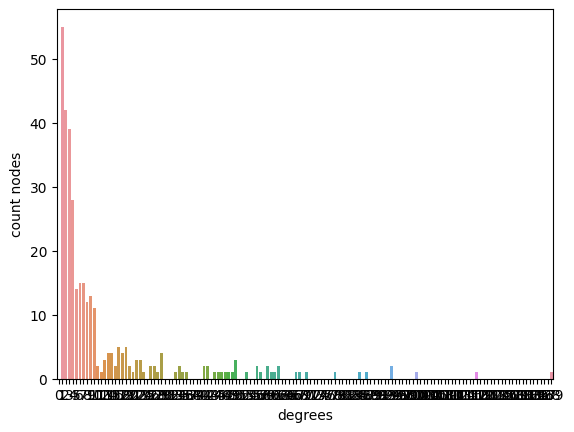

In [4]:
def plot_degree_hist(g):
    degree_freq = nx.degree_histogram(g)
    degrees = list(range(len(degree_freq)))

    sns.barplot(x=degrees, y=degree_freq)
    plt.xlabel("degrees")
    plt.ylabel("count nodes")
    plt.show()
    
plot_degree_hist(G)

## Subset the graph

Selected node: 12
Nodes: 15
Edges: 25


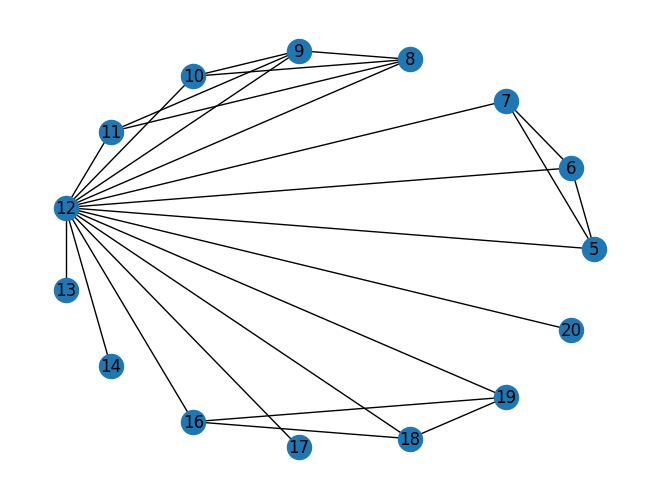

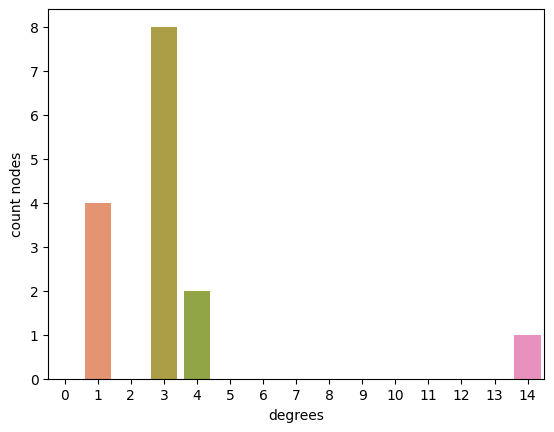

In [5]:
# Find first node with desired number of edges
for node, degs in G.degree():
    if degs >=10 and degs <= 20:
        break
print(f'Selected node: {node}')

# Extract immediate neighbors into a list
nodes = list(nx.neighbors(G, node))
nodes.append(node) # If we don't do this, our target node isn't included!

# Create new subgraph from the node's neighborhood and visualize
H = nx.induced_subgraph(G, nodes)
print(f'Nodes: {nx.number_of_nodes(H)}')
print(f'Edges: {nx.number_of_edges(H)}')

nx.draw_circular(H, with_labels=True)
plt.show()

plot_degree_hist(H)

## Alternate visualization with Netgraph

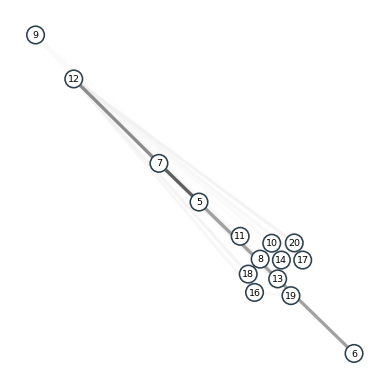

CPU times: user 530 ms, sys: 51.6 ms, total: 581 ms
Wall time: 314 ms


In [6]:
%%time
from netgraph import Graph, ArcDiagram

Graph(H, node_labels=True)
plt.show()

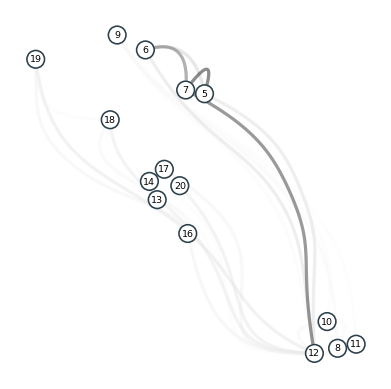

In [7]:
Graph(
    H, 
    node_layout='spring', 
    edge_layout='curved',
    node_labels=True    
)
plt.show()

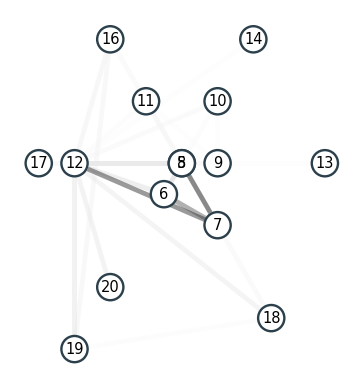

In [8]:
Graph(H, node_layout='radial', node_labels=True)